# Removing and splitting pandas DataFrame columns

When you are preparing to train machine learning models, you often need to delete specific columns, or split certain columns from your DataFrame into a new DataFrame.

We need the pandas library and a DataFrame to explore

In [3]:
import pandas as pd

Let's load a bigger csv file with more columns, **flight_delays.csv** provides information about flights and flight delays

In [4]:
delays_df = pd.read_csv('flight_delays.csv')
delays_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,1433,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,2020,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,2032,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,1223,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,1423,-7,100,92,80,580


## Removing a column from a DataFrame.

When you are preparing your data for machine learning, you may need to delete specific columns from the DataFrame before training the model.

For example:
Imagine you are training a model to predict how many minutes late a flight will be (ARR_DELAY)

If the model knew the scheduled arrival time (CRS_ARR_TIME) and the actual arrival time (ARR_TIME), the model would quickly figure out ARR_DELAY = ARR_TIME - CRS_ARR_TIME

When we predict arrival times for future flights, we won't have a value for  arrival time (ARR_TIME). So we should remove this column from the DataFrame so it is not used as a feature when training the model to predict ARR_DELAY.  

In [3]:
# Remove the column ARR_TIME from the DataFrane delays_df

#delays_df = delays_df.drop(['ARR_TIME'],axis=1)
new_df = delays_df.drop(columns=['ARR_TIME'])
new_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,-7,100,92,80,580


Use the **inplace** parameter to specify you want to drop the column from the original DataFrame

In [4]:
# Remove the column ARR_TIME from the DataFrame delays_df

#delays_df = delays_df.drop(['ARR_TIME'],axis=1)
delays_df.drop(columns=['ARR_TIME'], inplace=True)
delays_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,-7,100,92,80,580


We use different techniques to predict based on quantititative values which are usually numeric values (e.g. distance, number of minutes, weight) and qualitative (descriptive) values which may not be numeric (e.g. what airport a flight left from, what airline operated the flight)

Quantitative data may be moved into a separate DataFrame before training a model.

You also need to put the value you want to predict, called the label (ARR_DELAY) in a separate DataFrame from the values you think can help you make the prediction, called the features

We need to be able to create a new dataframe from the columns in an existing dataframe

In [ ]:
# Create a new DataFrame called desc_df
# include all rows
# include the columns ORIGIN, DEST, OP_CARRIER_FL_NUM, OP_UNIQUE_CARRIER, TAIL_NUM

desc_df = delays_df.loc[:,['ORIGIN', 'DEST', 'OP_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER', 'TAIL_NUM']]
desc_df.head()

In [5]:
delays_data = pd.read_csv('flight_delays.csv')

In [6]:
delays_data

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,1433,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,2020,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,2032,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,1223,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,1423,-7,100,92,80,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018-10-01,WN,N230WN,1176,ATL,HOU,1955,1955,0,2105,2057,-8,130,122,101,696
95,2018-10-01,WN,N786SW,1433,ATL,HOU,1130,1308,98,1235,1443,128,125,155,140,696
96,2018-10-01,WN,N452WN,2847,ATL,HOU,605,601,-4,710,659,-11,125,118,99,696
97,2018-10-01,WN,N8619F,5161,ATL,HOU,1340,1333,-7,1440,1503,23,120,150,136,696


In [8]:
delays_data.head(6)

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,1433,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,2020,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,2032,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,1223,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,1423,-7,100,92,80,580
5,2018-10-01,WN,N243WN,3998,ABQ,DAL,655,652,-3,940,924,-16,105,92,83,580


In [11]:
delays_data.drop(columns=["OP_UNIQUE_CARRIER"])

KeyError: "['OP_UNIQUE_CARRIER'] not found in axis"

In [10]:
delays_data

,FL_DATE,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,N221WN,802,ABQ,BWI,905,903,-2,1450,1433,-17,225,210,197,1670
1,2018-10-01,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,2020,-25,225,202,191,1670
2,2018-10-01,N920WN,1019,ABQ,DAL,1800,1802,2,2045,2032,-13,105,90,80,580
3,2018-10-01,N480WN,1499,ABQ,DAL,950,947,-3,1235,1223,-12,105,96,81,580
4,2018-10-01,N227WN,3635,ABQ,DAL,1150,1151,1,1430,1423,-7,100,92,80,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018-10-01,N230WN,1176,ATL,HOU,1955,1955,0,2105,2057,-8,130,122,101,696
95,2018-10-01,N786SW,1433,ATL,HOU,1130,1308,98,1235,1443,128,125,155,140,696
96,2018-10-01,N452WN,2847,ATL,HOU,605,601,-4,710,659,-11,125,118,99,696
97,2018-10-01,N8619F,5161,ATL,HOU,1340,1333,-7,1440,1503,23,120,150,136,696


In [12]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

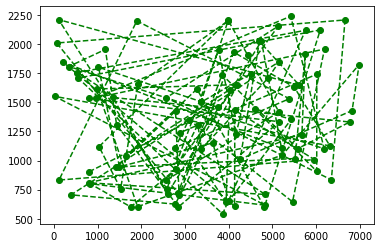

In [27]:
df = pd.read_csv('flight_delays.csv')

plt.plot(df["OP_CARRIER_FL_NUM"], df["DEP_TIME"], 'o--g')

plt.show

In [32]:
df.shape



(99, 16)

In [33]:
df.dtypes

FL_DATE                object
OP_UNIQUE_CARRIER      object
TAIL_NUM               object
OP_CARRIER_FL_NUM       int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME            int64
DEP_TIME                int64
DEP_DELAY               int64
CRS_ARR_TIME            int64
ARR_TIME                int64
ARR_DELAY               int64
CRS_ELAPSED_TIME        int64
ACTUAL_ELAPSED_TIME     int64
AIR_TIME                int64
DISTANCE                int64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FL_DATE              99 non-null     object
 1   OP_UNIQUE_CARRIER    99 non-null     object
 2   TAIL_NUM             99 non-null     object
 3   OP_CARRIER_FL_NUM    99 non-null     int64 
 4   ORIGIN               99 non-null     object
 5   DEST                 99 non-null     object
 6   CRS_DEP_TIME         99 non-null     int64 
 7   DEP_TIME             99 non-null     int64 
 8   DEP_DELAY            99 non-null     int64 
 9   CRS_ARR_TIME         99 non-null     int64 
 10  ARR_TIME             99 non-null     int64 
 11  ARR_DELAY            99 non-null     int64 
 12  CRS_ELAPSED_TIME     99 non-null     int64 
 13  ACTUAL_ELAPSED_TIME  99 non-null     int64 
 14  AIR_TIME             99 non-null     int64 
 15  DISTANCE             99 non-null     int64 
dtypes: int64(1

In [35]:
import sys

In [36]:
print(sys.getsizeof(df), "bytes")

39447 bytes


In [37]:
dictionary_data = df.to_json("mydic.json")

In [38]:
print(sys.getsizeof(df), "bytes")
print(sys.getsizeof(dictionary_data), "bytes")

39447 bytes
16 bytes


In [39]:
data = pd.read_json('mydic.json')

In [40]:
data

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903,-2,1450,1433,-17,225,210,197,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458,-2,2045,2020,-25,225,202,191,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802,2,2045,2032,-13,105,90,80,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947,-3,1235,1223,-12,105,96,81,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151,1,1430,1423,-7,100,92,80,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018-10-01,WN,N230WN,1176,ATL,HOU,1955,1955,0,2105,2057,-8,130,122,101,696
95,2018-10-01,WN,N786SW,1433,ATL,HOU,1130,1308,98,1235,1443,128,125,155,140,696
96,2018-10-01,WN,N452WN,2847,ATL,HOU,605,601,-4,710,659,-11,125,118,99,696
97,2018-10-01,WN,N8619F,5161,ATL,HOU,1340,1333,-7,1440,1503,23,120,150,136,696
